In [ ]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Web Scraper para obtener Mesas Electorales

In [ ]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome()

# Página de resultados
driver.get("https://resultados.gob.ar/elecciones/1/1/1/-1/-1/Buenos-Aires")  # Replace with the actual URL

# Espero que cargue
wait = WebDriverWait(driver, 20)

# Abrir Panel de filtros
element = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="root"]/div[2]/header/div[1]/div/div[2]/div[1]/nav/button')))
element.click()
#time.sleep(2)

#Abrir Dropdown y encontrar las secciones electorales
dropdown = driver.find_element(By.XPATH, '//*[@id="downshift-2-toggle-button"]')
dropdown.click()
#time.sleep(2)
secciones = driver.find_elements(By.XPATH, '//*[@id="menu-3"]/li')


# Cerrar Dropdown
dropdown.click()
#time.sleep(2)


i=0
listado_mesas = []

df_dict = {}

for i in range(0, len(secciones)):
    try:
        #time.sleep(1)

        #abrir dropdown
        dropdown.click()

        #fetchear opciones
        secciones = driver.find_elements(By.XPATH, '//*[@id="menu-3"]/li')
        #imprimit opción n

        seccion = secciones[i]
        seccion_str = seccion.text
        #print(seccion_str)
        seccion.click()


        driver.find_element(By.XPATH, '//*[@id="downshift-3-toggle-button"]').click()
        distritos = driver.find_elements(By.XPATH, '//*[@id="menu-4"]/li')
        driver.find_element(By.XPATH, '//*[@id="downshift-3-toggle-button"]').click()
    except:
        break
        print("Error en secciones")

    for j in range(0,len(distritos)):
        try:
            #time.sleep(1)

            #Abro dropdown de distritos electorales
            driver.find_element(By.XPATH, '//*[@id="downshift-3-toggle-button"]').click()

            #Fetcheo los distritos
            distritos = driver.find_elements(By.XPATH, '//*[@id="menu-4"]/li')

            #Imprimo distrito seleccionado
            distrito = distritos[j]
            distrito_str = distrito.text
            #print(distrito.text)
            distrito.click()

            try:
                driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[6]/div/button/div/button').click()
                circuitos = driver.find_elements(By.XPATH, '//*[@id="menu-6"]/li')
                driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[6]/div/button/div/button').click()
            except:
                print("Error abriendo dropdown de circuitos")
        except:
            print("Error en distritos")
            break

        for k in range(0,len(circuitos)):
            try:
               # time.sleep(1)

                #Abro dropdown de circuitos electorales
                driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[6]/div/button/div/button').click()

                #Fetcheo los circuitos
                circuitos = driver.find_elements(By.XPATH, '//*[@id="menu-6"]/li')

                #Imprimo circuito seleccionado
                circuito = circuitos[k]
                circuito_str = circuito.text
                #print(circuito.text)
                circuito.click()


                driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[7]/div/button/div/button').click()
                comicios = driver.find_elements(By.XPATH, '//*[@id="menu-7"]/li')
                driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[7]/div/button/div/button').click()
            except:
                print("Error en circuito")
                break

            for m in range(0,len(comicios)):
                try:
                    #time.sleep(2)

                    #Abro dropdown de comicios electorales
                    driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[7]/div/button/div/button').click()

                    #Fetcheo los comicios
                    comicios = driver.find_elements(By.XPATH, '//*[@id="menu-7"]/li')

                    #Imprimo comicio seleccionado
                    comicio = comicios[m]
                    comicio_str = comicio.text
                    #print(comicio.text)
                    comicio.click()

                    #Abro dropdown de mesas
                    driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/header/div[1]/div/div[2]/div[1]/nav/div[2]/div/div/div/div[1]/div[1]/ul/li[8]/div/button/div/button').click()
                    #Consigo lista de mesas
                    mesas = driver.find_elements(By.XPATH, '//*[@id="menu-8"]/li')
                    #driver.find_element(By.XPATH, '//*[@id="downshift-102-toggle-button"]').click()

                    len_mesas = range(0,len(mesas))
                    for n in len_mesas:
                        #listado_mesas.append(mesas[n].text)
                        mesa_str = mesas[n].text

                        try:

                            df_dict = {"Provincia": "Buenos Aires", "Sección Electoral": seccion_str, "Sección": distrito_str, "Circuito": circuito_str, "Comicio": comicio_str, "Mesa": mesa_str}

                            listado_mesas.append(df_dict)
                            print(df_dict)
                        except:
                            print("Error last block")
                            break
                except:
                    print("Error en mesa")
                    break

df = pd.DataFrame(listado_mesas)
driver.close()
df

# Request al backend del Ministerio del Interior para obtener resultados para las mesas scrapeadas

In [ ]:
import requests
import numpy as np

df = pd.read_csv(r"C:\Users\PC\Desktop\base_electoral.csv")

def votos(df):
    n = df["Mesa"]
    url = f'https://resultados.gob.ar/backend-difu/scope/data/getScopeData/{n}/1'

    # Send a GET request to the URL
    response = requests.get(url)

    # Initialize variables to store percentages
    LLA = np.nan
    UPP = np.nan
    JUNTOS = np.nan


    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response and store it as a dictionary
        data_dict = response.json()

        for partido in data_dict["partidos"]:
            if partido["code"] == "135":
                LLA = partido["perc"]
            if partido["code"] == "134":
                UPP = partido["perc"]
            if partido["code"] == "132":
                JUNTOS = partido["perc"]

    df["perc_LLA"] = LLA
    df["perc_UPP"] = UPP
    df["perc_JUNTOS"] = JUNTOS

    return df

In [ ]:
df = df.apply(votos, axis=1)
df

# Intentando joinear circuitos electorales con geometrías del 2018

In [ ]:
import geopandas as gpd
import pandas as pd
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\circuitos-electorales.geojson")
gdf.plot()

In [ ]:

gdf.drop_duplicates(subset="circuito_id",inplace=True,)
contains_letter = gdf['circuito_id'].str.contains(r'[a-zA-Z]')
does_not_contain_letter = ~gdf['circuito_id'].str.contains(r'[a-zA-Z]')

gdf_letras = gdf[contains_letter]
gdf_letras

In [ ]:
gdf_numeros = gdf[does_not_contain_letter]
gdf_numeros["circuito_id"] = gdf_numeros["circuito_id"].astype(int)
gdf_numeros

In [ ]:
df = pd.read_excel(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Base_Votos.xlsx")
df = df.groupby("Circuito").agg(perc_LLA=("perc_LLA","mean"),perc_UPP=("perc_UPP","mean"),perc_JUNTOS=("perc_JUNTOS","mean")).reset_index()

contains_letter = df['Circuito'].str.contains(r'[a-zA-Z]')
does_not_contain_letter = ~df['Circuito'].str.contains(r'[a-zA-Z]')
df_letras = df[contains_letter]
df_letras

In [ ]:
df_numeros = df[does_not_contain_letter]
df_numeros["Circuito"] = df_numeros["Circuito"].astype(int)
df_numeros

In [ ]:
merge_numeros = gdf_numeros.merge(df_numeros,right_on="Circuito",left_on="circuito_id",how="inner")
print(len(merge_numeros))
merge_numeros.plot()

In [ ]:
merge_letras = gdf_letras.merge(df_letras,right_on="Circuito",left_on="circuito_id",how="inner")
print(len(merge_letras))
merge_letras.plot()

In [ ]:
merge = pd.concat([merge_letras,merge_numeros])
print((len(merge)/len(df)))
merge.plot()

In [ ]:
merge

## Logré mantener un 96% de los datos originales

In [ ]:
merge.to_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Base_c_geometrías.geojson", driver='GeoJSON')

# Join de Circuitos con Radios Censales

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
## Cargamos los circuitos electorales con geometría

gdf_circuitos = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Base_c_geometrías.geojson")
gdf_circuitos

In [ ]:
## Cargamos Radios censales con geometría

gdf_radios = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\radios_censales.geojson")
gdf_radios

In [ ]:

## Ploteo las geometrias

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first GeoDataFrame on the first axis
gdf_radios.plot(ax=axs[0], color='blue', edgecolor='black')
axs[0].set_title('Radios Censales')

# Plot the second GeoDataFrame on the second axis
gdf_circuitos.plot(ax=axs[1], color='green', edgecolor='black')
axs[1].set_title('Circuitos Electorales')
plt.tight_layout()


plt.show()

In [ ]:
## Join spatial con intersect y en las intersecciones multiples calculo el promedio
results = gpd.sjoin(gdf_radios,gdf_circuitos, op='intersects')
results = results.groupby("link").agg(perc_LLA=("perc_LLA","mean"),perc_UPP=("perc_UPP","mean"),perc_JUNTOS=("perc_JUNTOS","mean"),geometry=("geometry","first"))
results = gpd.GeoDataFrame(results, geometry="geometry")
results

In [ ]:
# Create subplots for the three columns and titles
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')  # Adjust figsize as needed

# List of columns and titles
columns = ["perc_LLA", "perc_UPP", "perc_JUNTOS"]
titles = ["La Libertad Avanza", "Unión x la Patria", "Juntos"]
cmaps = ["Purples","Blues","Wistia"]

for i, (column, title) in enumerate(zip(columns, titles)):
    results.plot(column=column, cmap=cmaps[i], legend=True, ax=axes[i])
    axes[i].set_title(title)
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
results.to_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson", driver='GeoJSON')

# Cruzo con variables censo personas

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson")
gdf["link"] = gdf["link"].astype(int)
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090..."
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728..."
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032..."
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426..."
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464..."
...,...,...,...,...,...
19007,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750..."
19008,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327..."
19009,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688..."
19010,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822..."


In [9]:
df_censo = pd.read_csv(r"C:\Users\nunez\Facultad\Factor Data Track CSS\Trabajo Final Integrador\TFI\data\Censo 2010, Ampliada por radio.csv")
df_censo

,Código de radio,Población censada en el radio,Población proyectada en el radio,Población afrodescendiente,Personas que cobran pensión no contributiva,Personas que reciben jubilación (65 años y más),Personas que reciben pensión (65 años y más),Personas que reciben jubilación o pensión (65 años y más),Personas de 65 años y más,Obra social (incluye PAMI),...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio.1,Población total,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,20010101,94,94,0,3,0,0,0,3,15,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010101,336,65,-34.586689,-58.368836,1.794474
1,20010201,473,473,3,12,8,0,8,11,118,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010201,478,161,-34.578623,-58.386987,0.027308
2,20010202,397,397,0,10,3,0,3,5,106,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010202,401,128,-34.579194,-58.387533,0.017667
3,20010203,337,337,0,24,4,0,4,6,87,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010203,337,104,-34.580158,-58.385503,0.010959
4,20010204,601,601,0,31,5,2,6,9,180,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010204,602,163,-34.580006,-58.382654,0.136300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49463,940140808,286,1712,0,16,15,5,15,15,693,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140808,1039,368,-54.817621,-68.332627,0.135818
49464,940140810,93,540,5,22,16,0,16,21,310,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140810,1344,439,-54.821163,-68.332311,0.138064
49465,940140811,92,594,0,11,0,0,0,11,274,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140811,906,309,-54.822765,-68.338301,0.267663
49466,940140812,103,717,9,21,0,7,7,7,566,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140812,951,294,-54.825942,-68.331134,0.272890


In [11]:
df_personas = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Indicadores de personas. Radios, 2010.csv")
df_personas

,Código de radio.,Población total (en hogares familiares).,Población de 0 a 17 años.,Población de 0 a 3 años.,Población de 4 a 5 años.,Población de 6 a 12 años.,Población de 13 a 17 años.,Población de 18 años y más.,Población de 18 a 29 años.,Población de 30 a 54 años.,...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,20010101,207,51,16,5,13,17,156,51,86,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010101,336,65,-34.586689,-58.368836,1.794474
1,20010201,473,170,48,20,58,44,303,136,138,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010201,478,161,-34.578623,-58.386987,0.027308
2,20010202,397,162,44,21,56,41,235,104,107,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010202,401,128,-34.579194,-58.387533,0.017667
3,20010203,337,128,34,18,39,37,209,89,99,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010203,337,104,-34.580158,-58.385503,0.010959
4,20010204,601,244,53,23,94,74,357,159,160,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010204,602,163,-34.580006,-58.382654,0.136300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52374,940140809,749,242,55,32,95,60,507,161,262,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140809,749,248,-54.819638,-68.327676,0.099390
52375,940140810,1312,427,89,46,161,131,885,293,472,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140810,1344,439,-54.821163,-68.332311,0.138064
52376,940140811,906,291,63,33,106,89,615,210,324,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140811,906,309,-54.822765,-68.338301,0.267663
52377,940140812,933,243,51,28,94,70,690,221,347,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140812,951,294,-54.825942,-68.331134,0.272890


In [12]:
gdf = pd.merge(gdf,df_personas,left_on="link",right_on="Código de radio.",how="inner")
#gdf = pd.merge(gdf,df_hogares,left_on="link",right_on="Código de radio.",how="inner")
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio.,Población total (en hogares familiares).,Población de 0 a 17 años.,Población de 0 a 3 años.,Población de 4 a 5 años.,...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,478,120,18,14,...,6,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,677,165,22,22,...,6,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,27,7,2,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,2,0,0,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,34,10,3,1,...,6,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,306,134,41,12,...,6,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934
18983,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,1377,590,130,73,...,6,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221
18984,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,1137,507,111,63,...,6,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029
18985,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,47,10,4,2,...,6,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558


In [20]:
for column in gdf.iloc[:,7:54]:
    gdf[column] = gdf[column]/gdf["Población total (en hogares familiares)."]
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio.,Población total (en hogares familiares).,Población de 0 a 17 años.,Población de 0 a 3 años.,Población de 4 a 5 años.,...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,478,0.000525,0.037657,0.029289,...,6,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,677,0.000360,0.032496,0.032496,...,6,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,27,0.009602,0.074074,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,2,0.000000,0.000000,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,34,0.008651,0.088235,0.029412,...,6,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,306,0.001431,0.133987,0.039216,...,6,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934
18983,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,1377,0.000311,0.094408,0.053014,...,6,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221
18984,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,1137,0.000392,0.097625,0.055409,...,6,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029
18985,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,47,0.004527,0.085106,0.042553,...,6,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558


In [26]:
results = []

# List of parties to calculate correlations for
parties = ["perc_LLA", "perc_UPP", "perc_JUNTOS"]

# Calculate correlations and store results in the list
for party in parties:
    for column in gdf.iloc[:, 7:54]:
        correlation = gdf[party].corr(gdf[column])
        results.append({'Party': party, 'Column': column, 'Correlation': correlation})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Print the results DataFrame
results_df

,Party,Column,Correlation
0,perc_LLA,Población de 0 a 17 años.,0.052863
1,perc_LLA,Población de 0 a 3 años.,0.160978
2,perc_LLA,Población de 4 a 5 años.,0.129638
3,perc_LLA,Población de 6 a 12 años.,0.204250
4,perc_LLA,Población de 13 a 17 años.,0.184146
...,...,...,...
136,perc_JUNTOS,Población de 13 a 17 sin secundaria completa,-0.366611
137,perc_JUNTOS,Población de 18 a 29 sin secundaria completa q...,-0.335354
138,perc_JUNTOS,Población de 18 a 29 sin secundaria completa,-0.379000
139,perc_JUNTOS,Población de 14 a 25 años sin secundario compl...,-0.408193


In [31]:
results_df[results_df["Party"] == "perc_UPP"]

,Party,Column,Correlation
47,perc_UPP,Población de 0 a 17 años.,-0.190477
48,perc_UPP,Población de 0 a 3 años.,0.269895
49,perc_UPP,Población de 4 a 5 años.,0.183252
50,perc_UPP,Población de 6 a 12 años.,0.245158
51,perc_UPP,Población de 13 a 17 años.,0.276635
52,perc_UPP,Población de 18 años y más.,-0.333134
53,perc_UPP,Población de 18 a 29 años.,0.235962
54,perc_UPP,Población de 30 a 54 años.,-0.123674
55,perc_UPP,Población de 55 a 69 años.,-0.296707
56,perc_UPP,Población de 70 años y más.,-0.283787


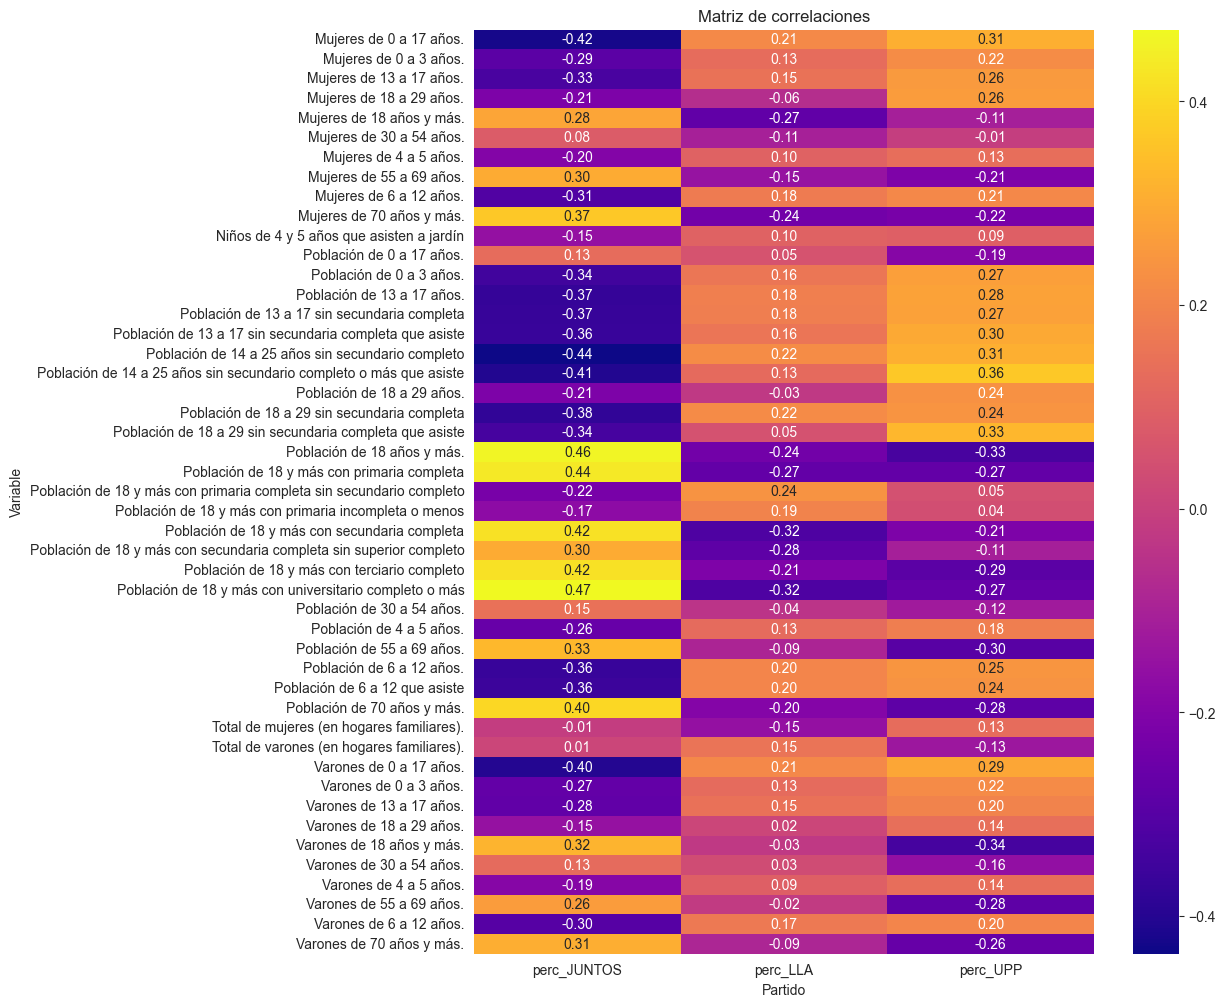

In [44]:
heatmap_data = results_df.pivot(index='Column', columns='Party', values='Correlation')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt=".2f")

plt.xlabel('Partido')
plt.ylabel('Variable')
plt.title('Matriz de correlaciones')
plt.show()

# Variables Hogares

In [45]:
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson")
gdf["link"] = gdf["link"].astype(int)
df_hogares = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Indicadores de hogares. Radios, 2010.csv")
gdf = pd.merge(gdf,df_hogares,left_on="link",right_on="Código de radio.",how="inner")
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio.,Total de hogares,Hogares con al menos un indicador NBI,Hogares con computadora,Hogares con una o más personas de servicio doméstico sin retiro (con cama),...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares.1,Latitud del centroide,Longitud del centroide,Superficie en km2
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,178,1,73,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,253,9,93,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,13,0,1,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,1,0,0,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,12,1,2,0,...,6,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,92,39,25,0,...,6,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934
18983,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,359,96,137,0,...,6,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221
18984,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,300,71,94,1,...,6,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029
18985,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,18,16,0,0,...,6,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558


In [48]:
for column in gdf.iloc[:,7:33]:
    gdf[column] = gdf[column]/gdf["Total de hogares"]
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio.,Total de hogares,Hogares con al menos un indicador NBI,Hogares con computadora,Hogares con una o más personas de servicio doméstico sin retiro (con cama),...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares.1,Latitud del centroide,Longitud del centroide,Superficie en km2
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,178,0.005618,0.410112,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,253,0.035573,0.367589,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,13,0.000000,0.076923,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,1,0.000000,0.000000,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,12,0.083333,0.166667,0.000000,...,6,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18982,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,92,0.423913,0.271739,0.000000,...,6,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934
18983,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,359,0.267409,0.381616,0.000000,...,6,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221
18984,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,300,0.236667,0.313333,0.003333,...,6,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029
18985,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,18,0.888889,0.000000,0.000000,...,6,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558


In [50]:
results = []

# List of parties to calculate correlations for
parties = ["perc_LLA", "perc_UPP", "perc_JUNTOS"]

# Calculate correlations and store results in the list
for party in parties:
    for column in gdf.iloc[:, 7:33]:
        correlation = gdf[party].corr(gdf[column])
        results.append({'Party': party, 'Column': column, 'Correlation': correlation})


results_df = pd.DataFrame(results)
results_df

,Party,Column,Correlation
0,perc_LLA,Hogares con al menos un indicador NBI,0.139311
1,perc_LLA,Hogares con computadora,-0.236742
2,perc_LLA,Hogares con una o más personas de servicio dom...,-0.037567
3,perc_LLA,Hogares con hacinamiento (>= 3 personas por cu...,0.172912
4,perc_LLA,Hogares sin heladeras,0.124232
...,...,...,...
73,perc_JUNTOS,Hogares con jefes con secundaria completa o su...,0.237353
74,perc_JUNTOS,Hogares con jefes con secundaria completa o más,0.388366
75,perc_JUNTOS,Hogares con jefes con terciaria completa,0.352007
76,perc_JUNTOS,Hogares con jefes con universitaria completa,0.439311


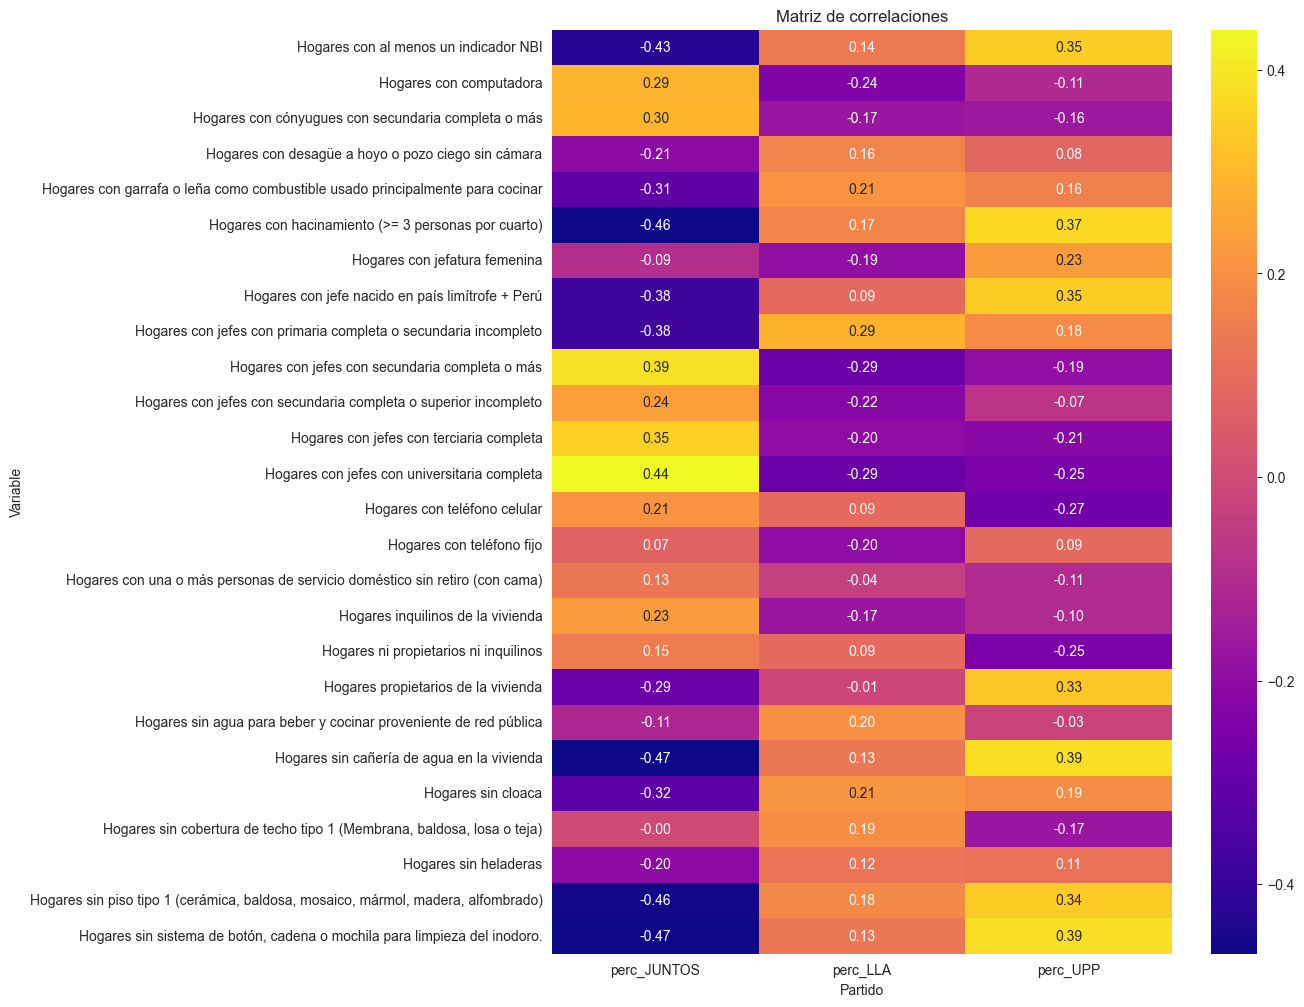

In [51]:
heatmap_data = results_df.pivot(index='Column', columns='Party', values='Correlation')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt=".2f")

plt.xlabel('Partido')
plt.ylabel('Variable')
plt.title('Matriz de correlaciones')
plt.show()

In [86]:
gdf["perc_JUNTOS+perc_UPP"] = gdf["perc_JUNTOS"]+gdf["perc_UPP"]
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio,Área en km2,Densidad de población,Menores de 18 años,Población total,...,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio.1,Población total.1,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2,perc_JUNTOS+perc_UPP
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,0.444204,1078.333006,120,479,...,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946,60.932500
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,0.664095,1019.432617,165,677,...,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457,60.932500
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,1.412967,19.108724,7,27,...,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683,60.932500
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,23.496473,0.085119,0,2,...,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279,60.932500
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,367.529103,0.092510,10,34,...,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322,64.630611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,23.966069,12.768052,134,306,...,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934,57.106050
18862,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,19.361583,71.120219,590,1377,...,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221,55.371385
18863,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,0.355734,3196.206263,507,1137,...,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029,55.371385
18864,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,335.041957,0.140281,10,47,...,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558,56.398089


In [ ]:
for party in parties:
        correlation = gdf[party].corr(gdf[party])
        results.append({'Party': party, 'Party': column, 'Correlation': correlation})

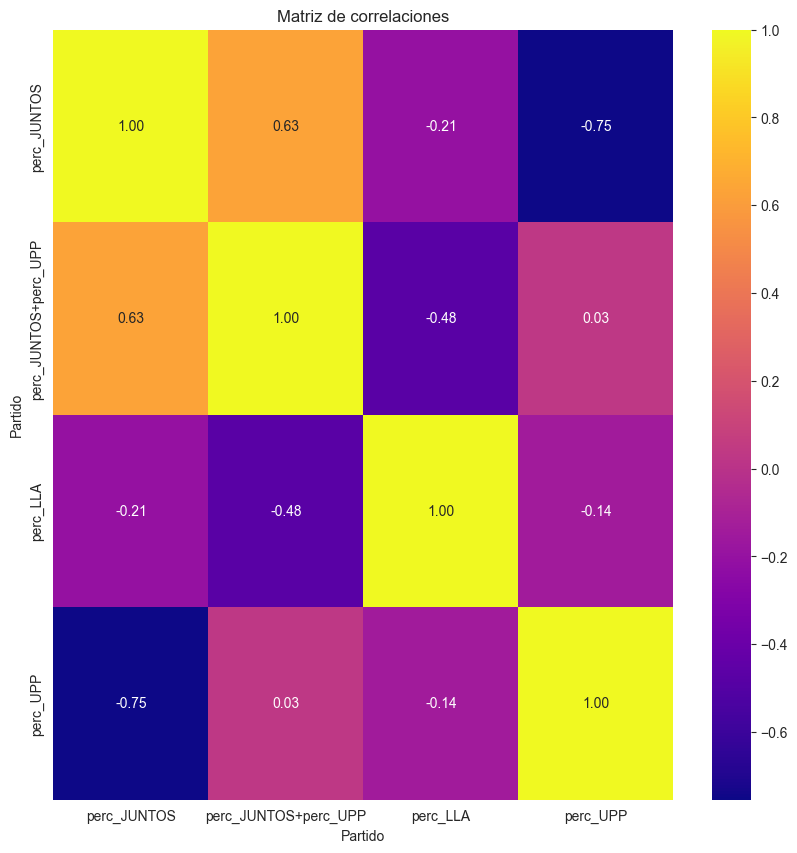

In [87]:
results = []

# List of parties to calculate correlations for
parties = ["perc_LLA", "perc_UPP", "perc_JUNTOS","perc_JUNTOS+perc_UPP"]

# Calculate correlations and store results in the list
for Party in parties:
    for party in parties:
        correlation = gdf[party].corr(gdf[Party])
        results.append({'Party': party, 'Column': Party, 'Correlation': correlation})


results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='Column', columns='Party', values='Correlation')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt=".2f")

plt.xlabel('Partido')
plt.ylabel('Partido')
plt.title('Matriz de correlaciones')
plt.show()

# Vulnerabilidad Sanitaria

In [65]:
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson")
#df_pobreza_cronica = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Pobreza Crónica x Radio Censal.csv")
df_vulnerabilidad_sanitaria = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Vulnerabilidad sanitaria 2010-2018.csv")

gdf["link"] = gdf["link"].astype(int)
gdf = pd.merge(gdf,df_vulnerabilidad_sanitaria,left_on="link",right_on="RADIO",how="inner")
gdf

,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,RADIO,Vulnerabilidad sanitaria,NSE,Centro de salud,Hospital,...,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2,Geometría en GeoJSON
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,0.585666,0.143033,164.602,4.092,...,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797952,-63.341822,0.284343,"{""type"":""Polygon"",""coordinates"":[[[-63.341320,..."
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,0.587671,0.146497,173.168,6.602,...,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803937,-63.337754,0.424947,"{""type"":""Polygon"",""coordinates"":[[[-63.338576,..."
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,0.674752,0.057516,36.732,203.860,...,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683,"{""type"":""Polygon"",""coordinates"":[[[-63.372129,..."
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,0.024898,0.954747,57.876,224.218,...,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146004,"{""type"":""Polygon"",""coordinates"":[[[-63.384821,..."
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,0.763297,0.001738,162.470,254.882,...,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393503,"{""type"":""Polygon"",""coordinates"":[[[-63.385232,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19007,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,0.892385,-0.549894,91.580,132.028,...,Buenos Aires,6882,Zárate,68821709,306,92,-34.145597,-59.040747,16.374067,"{""type"":""Polygon"",""coordinates"":[[[-59.007514,..."
19008,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,0.869372,-0.326430,143.658,364.970,...,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126916,-58.996424,13.234341,"{""type"":""Polygon"",""coordinates"":[[[-59.004375,..."
19009,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,0.719607,-0.279142,3.314,185.810,...,Buenos Aires,6882,Zárate,68821711,1137,300,-34.137666,-59.004711,0.243139,"{""type"":""Polygon"",""coordinates"":[[[-59.006373,..."
19010,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,0.994565,-0.915920,128.340,355.394,...,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155554,"{""type"":""Polygon"",""coordinates"":[[[-59.223744,..."


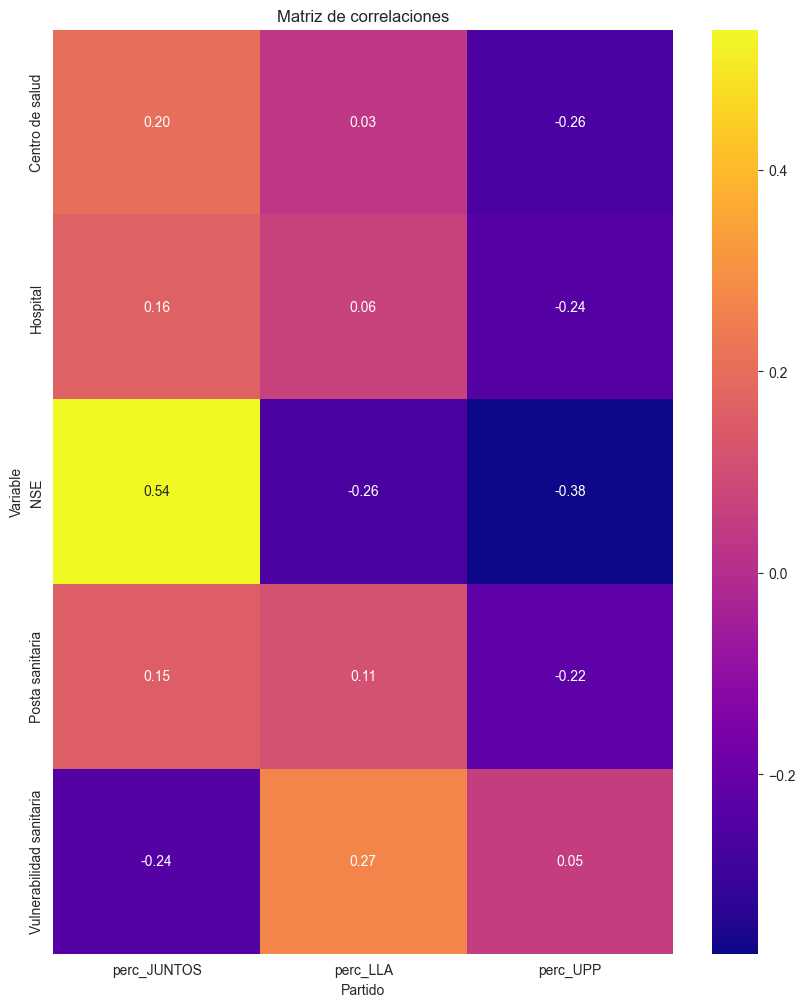

In [66]:
results = []

# List of parties to calculate correlations for
parties = ["perc_LLA", "perc_UPP", "perc_JUNTOS"]

# Calculate correlations and store results in the list
for party in parties:
    for column in gdf.iloc[:, 6:11]:
        correlation = gdf[party].corr(gdf[column])
        results.append({'Party': party, 'Column': column, 'Correlation': correlation})

results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='Column', columns='Party', values='Correlation')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt=".2f")

plt.xlabel('Partido')
plt.ylabel('Variable')
plt.title('Matriz de correlaciones')
plt.show()

# Resultados elecciones 2015

In [75]:
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson")
df_elecciones_2015 = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Elecciones generales de presidente y vicepresidente estimados por radio.csv")

gdf["link"] = gdf["link"].astype(int)
gdf = pd.merge(gdf, df_elecciones_2015, left_on="link", right_on="Código de radio", how="inner")
gdf

C:\Users\PC\AppData\Local\Temp\ipykernel_16328\3819195157.py:2: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_elecciones_2015 = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Elecciones generales de presidente y vicepresidente estimados por radio.csv")


,link,perc_LLA,perc_UPP,perc_JUNTOS,geometry,Código de radio,Área en km2,Densidad de población,Menores de 18 años,Población total,...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio.1,Población total.1,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,60070101,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.34132 -36.79406, -63.34090...",60070101,0.444204,1078.333006,120,479,...,6,Buenos Aires,6007,Adolfo Alsina,60070101,479,178,-36.797757,-63.341687,0.244946
1,60070102,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.33858 -36.80085, -63.33728...",60070102,0.664095,1019.432617,165,677,...,6,Buenos Aires,6007,Adolfo Alsina,60070102,677,253,-36.803558,-63.337630,0.407457
2,60070103,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.37213 -36.66186, -63.37032...",60070103,1.412967,19.108724,7,27,...,6,Buenos Aires,6007,Adolfo Alsina,60070103,27,13,-36.660961,-63.364417,0.907683
3,60070104,29.627500,9.957500,50.975000,"MULTIPOLYGON (((-63.38495 -36.65154, -63.38426...",60070104,23.496473,0.085119,0,2,...,6,Buenos Aires,6007,Adolfo Alsina,60070104,2,1,-36.644307,-63.360443,15.146279
4,60070105,23.755722,23.777944,40.852667,"MULTIPOLYGON (((-63.38464 -36.52606, -63.38464...",60070105,367.529103,0.092510,10,34,...,6,Buenos Aires,6007,Adolfo Alsina,60070105,34,12,-36.669486,-63.322869,236.393322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,68821709,24.568134,28.429201,28.676848,"MULTIPOLYGON (((-59.00752 -34.11348, -59.00750...",68821709,23.966069,12.768052,134,306,...,6,Buenos Aires,6882,Zárate,68821709,306,92,-34.145622,-59.042208,16.922934
18862,68821710,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00437 -34.11198, -59.00327...",68821710,19.361583,71.120219,590,1377,...,6,Buenos Aires,6882,Zárate,68821710,1377,359,-34.126479,-58.996724,13.422221
18863,68821711,23.807483,30.133188,25.238197,"MULTIPOLYGON (((-59.00637 -34.14070, -59.00688...",68821711,0.355734,3196.206263,507,1137,...,6,Buenos Aires,6882,Zárate,68821711,1137,300,-34.136855,-59.005537,0.247029
18864,68821802,22.424086,35.032346,21.365743,"MULTIPOLYGON (((-59.11064 -33.90324, -59.11822...",68821802,335.041957,0.140281,10,47,...,6,Buenos Aires,6882,Zárate,68821802,47,18,-33.885531,-59.187108,230.155558


Text(0.5, 1.0, 'Matriz de correlaciones')

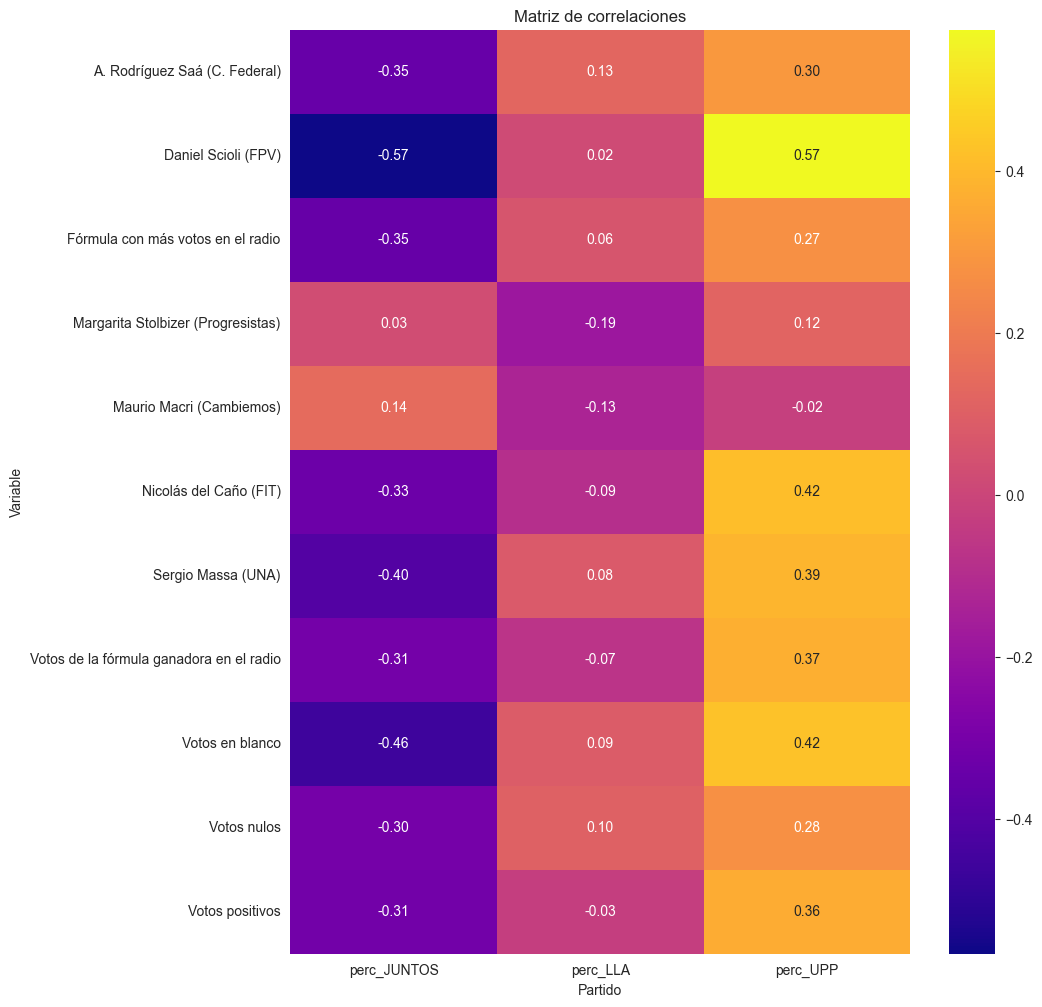

In [84]:
results = []

# List of parties to calculate correlations for
parties = ["perc_LLA", "perc_UPP", "perc_JUNTOS"]

# Calculate correlations and store results in the list
for party in parties:
    for column in gdf.iloc[:, 12:23]:
        correlation = gdf[party].corr(gdf[column])
        results.append({'Party': party, 'Column': column, 'Correlation': correlation})

results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='Column', columns='Party', values='Correlation')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', fmt=".2f")

plt.xlabel('Partido')
plt.ylabel('Variable')
plt.title('Matriz de correlaciones')

# Entrenando un Árbol


## Primero hay que hacer un super dataset

In [88]:
gdf = gpd.read_file(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Radios_Censales_C_Resultados.geojson")
df_elecciones_2015 = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Elecciones generales de presidente y vicepresidente estimados por radio.csv")
df_hogares = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Indicadores de hogares. Radios, 2010.csv")


C:\Users\PC\AppData\Local\Temp\ipykernel_16328\4242493934.py:2: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_elecciones_2015 = pd.read_csv(r"C:\Users\nunez\Facultad\Research\Elecciones\Datasets\Sources\Elecciones generales de presidente y vicepresidente estimados por radio.csv")


In [89]:
df_elecciones_2015

,Código de radio,Área en km2,Densidad de población,Menores de 18 años,Población total,Hogares,Urbano,Maurio Macri (Cambiemos),Daniel Scioli (FPV),Sergio Massa (UNA),...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio.1,Población total.1,Total de hogares,Latitud del centroide,Longitud del centroide,Superficie en km2
0,20010101,2.660685,126.283257,63,336,65,3,12.830626,39.355892,11.966610,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010101,336,65,-34.586689,-58.368836,1.794474
1,20010201,0.040471,11810.856593,170,478,161,2,14.475578,44.401519,13.500791,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010201,478,161,-34.578623,-58.386987,0.027308
2,20010202,0.026122,15350.762571,162,401,128,2,11.232672,34.454426,10.476263,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010202,401,128,-34.579194,-58.387533,0.017667
3,20010203,0.016316,20654.132352,128,337,104,2,9.822713,30.129602,9.161251,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010203,337,104,-34.580158,-58.385503,0.010959
4,20010204,0.203193,2962.703462,244,602,163,2,16.825509,51.609558,15.692478,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010204,602,163,-34.580006,-58.382654,0.136300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50779,940140809,0.298819,2506.531138,242,749,248,2,209.562477,305.333272,175.192745,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140809,749,248,-54.819638,-68.327676,0.099390
50780,940140810,0.415029,3238.331221,433,1344,439,2,376.551118,548.636314,314.794064,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140810,1344,439,-54.821163,-68.332311,0.138064
50781,940140811,0.804582,1126.051236,291,906,309,2,254.203005,370.374679,212.511909,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140811,906,309,-54.822765,-68.338301,0.267663
50782,940140812,0.820238,1159.419011,243,951,294,2,292.643459,426.382558,244.647856,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140812,951,294,-54.825942,-68.331134,0.272890


In [90]:
df_hogares

,Código de radio.,Total de hogares,Hogares con al menos un indicador NBI,Hogares con computadora,Hogares con una o más personas de servicio doméstico sin retiro (con cama),Hogares con hacinamiento (>= 3 personas por cuarto),Hogares sin heladeras,"Hogares sin sistema de botón, cadena o mochila para limpieza del inodoro.",Hogares sin agua para beber y cocinar proveniente de red pública,Hogares sin cañería de agua en la vivienda,...,Código de provincia,Nombre de provincia,Código de departamentos/comuna,Nombre de departamentos/comuna,Código de radio,Población total,Total de hogares.1,Latitud del centroide,Longitud del centroide,Superficie en km2
0,20010101,65,19,31,0,9,10,11,5,11,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010101,336,65,-34.586689,-58.368836,1.794474
1,20010201,161,43,42,0,14,37,35,15,35,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010201,478,161,-34.578623,-58.386987,0.027308
2,20010202,128,25,24,0,17,20,37,2,37,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010202,401,128,-34.579194,-58.387533,0.017667
3,20010203,104,25,43,0,10,28,37,0,37,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010203,337,104,-34.580158,-58.385503,0.010959
4,20010204,163,23,67,0,14,28,40,0,40,...,2,Ciudad Autónoma de Buenos Aires,2001,Comuna 1,20010204,602,163,-34.580006,-58.382654,0.136300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52368,940140809,248,20,178,0,7,9,5,3,5,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140809,749,248,-54.819638,-68.327676,0.099390
52369,940140810,439,50,330,0,12,19,4,0,4,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140810,1344,439,-54.821163,-68.332311,0.138064
52370,940140811,309,75,204,0,17,31,8,0,8,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140811,906,309,-54.822765,-68.338301,0.267663
52371,940140812,294,8,255,0,3,2,0,1,0,...,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",94014,Ushuaia,940140812,951,294,-54.825942,-68.331134,0.272890
